In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
car_train=pd.read_csv("../data/train.csv")
car_test=pd.read_csv("../data/test.csv")

## Missing values

In [4]:
car_train = car_train.drop(["Descuento"], axis = 1)
car_test = car_test.drop(["Descuento"], axis = 1)

### Sustituir por la moda de la misma compañia

In [ ]:
car_train = car_train[car_train['Nombre'].notna()]
car_train.reset_index(drop=True)

In [ ]:
car_train.Consumo = car_train.Consumo.replace('0.0 kmpl', np.nan)

In [ ]:
part = car_train['Nombre'].astype(str).str.partition()
car_train['Company'] = part[0].str.title()
#car_train_2['Car_name'] = part[2]

In [ ]:
#df_train.loc[df_train['brand_name'] == 'Maruti']['Asientos'].mode()[0]
def fill_na_with_mode(ds, brandname, column):
    if ds.loc[ds['Company'] == brandname][column].isnull().any() == False:
        fill_value = ds.loc[ds['Company'] == brandname][column].mode()[0]
        condit = ((ds['Company'] == brandname) & (ds[column].isnull()))
        ds.loc[condit, column] = ds.loc[condit, column].fillna(fill_value)

In [ ]:
for col in list(car_train.columns):
    if car_train[col].isnull().any():
         for brand in list(car_train.Company.unique()):
                fill_na_with_mode(car_train, brand, col)

In [ ]:
car_train = car_train.drop(["Company"], axis = 1)

### Or fill the missing values with the mean if numeric or the mode if object

In [ ]:
for i in car_train.columns:
    if car_train[i].isnull().values.any():
        if car_train[i].dtype == "O":
            car_train[i]= car_train[i].fillna((car_train[i].mode()[0]))
        else:
            car_train[i]= car_train[i].fillna((car_train[i].mean()))

### Or drop all missing values

In [5]:
# Probar a rellenar
car_train = car_train.dropna()
car_test = car_test.dropna()

## Etiquetado

### Usando label encoder

In [ ]:
car_train_orig = car_train.copy()
car_test_orig =  car_test.copy()

In [ ]:
for i in list(car_train.columns):
    if car_train[i].dtypes == "object":
        to_read = "../data/" + i.lower() + ".csv"
        label = LabelEncoder().fit(pd.read_csv(to_read)[i])
        car_train[i] = label.transform(car_train_orig[i])
        car_test[i] = label.transform(car_test_orig[i])

In [ ]:
car_train.head()

### O usando one hot para algunas variables

### Train

In [6]:
car_train['Consumo']=car_train.Consumo.astype(str).str.partition()[0].astype('float')
car_train['Motor_CC']=car_train.Motor_CC.astype(str).str.partition()[0].astype('float')
car_train['Potencia']=car_train.Potencia.astype(str).str.partition()[0].astype('float')

In [7]:
car_train.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [8]:
tipo_marchas = car_train[['Tipo_marchas']]
tipo_marchas = pd.get_dummies(tipo_marchas, drop_first=True)
ciudad = car_train[['Ciudad']]
ciudad = pd.get_dummies(ciudad, drop_first=True)
combustible = car_train[['Combustible']]
combustible = pd.get_dummies(combustible, drop_first=True)

In [9]:
car_train = pd.concat([car_train, ciudad , tipo_marchas, combustible], axis = 1)

In [10]:
car_train = car_train.drop(["Ciudad", "Tipo_marchas", "Combustible"], axis = 1)

In [11]:
car_train = car_train.reset_index(drop=True)

In [12]:
car_train_orig = car_train.copy()
car_test_orig =  car_test.copy()

In [13]:
label = LabelEncoder().fit(pd.read_csv('../data/nombre.csv').Nombre)
car_train.Nombre = label.transform(car_train_orig.Nombre)
car_test.Nombre = label.transform(car_test_orig.Nombre)

In [14]:
car_train.head()

,id,Nombre,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Precio_cat,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,1.0,1143,2012.0,83000.0,1,23.40,1248.0,74.00,5.0,3,...,1,0,0,0,0,0,1,1,0,0
1,2.0,1204,2016.0,4800.0,1,20.51,998.0,67.04,5.0,3,...,0,0,1,0,0,0,1,0,0,1
2,3.0,846,2016.0,26000.0,1,25.32,1198.0,77.00,6.0,3,...,0,0,0,0,0,0,1,1,0,0
3,4.0,714,2013.0,56127.0,1,18.50,1197.0,80.00,5.0,3,...,0,0,0,0,0,0,1,0,0,1
4,5.0,472,2017.0,41981.0,1,18.70,1199.0,88.70,5.0,3,...,0,1,0,0,0,0,1,0,0,1


### Test

In [15]:
car_test['Consumo']=car_test.Consumo.astype(str).str.partition()[0].astype('float')
car_test['Motor_CC']=car_test.Motor_CC.astype(str).str.partition()[0].astype('float')
car_test['Potencia']=car_test.Potencia.astype(str).str.partition()[0].astype('float')

In [16]:
car_test.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [17]:
# Tipo_marchas
tipo_marchas = car_test[["Tipo_marchas"]]
tipo_marchas = pd.get_dummies(tipo_marchas,drop_first=True)

# ciudad
ciudad = car_test[["Ciudad"]]
ciudad = pd.get_dummies(ciudad,drop_first=True)

# Combustible
combustible = car_test[["Combustible"]]
combustible = pd.get_dummies(combustible,drop_first=True)

In [18]:
car_test = pd.concat([car_test, ciudad, tipo_marchas, combustible ], axis = 1)

In [19]:
car_test.drop(['Tipo_marchas', 'Ciudad', 'Combustible'], axis = 1, inplace = True)

In [20]:
car_test = car_test.reset_index(drop=True)

In [21]:
# Get missing columns in the training test
missing_cols = set( car_train.columns ) - set( car_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    car_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
car_test = car_test[car_train.columns]

In [22]:
car_test = car_test.drop('Precio_cat', axis=1)

In [23]:
car_train = car_train.drop('id', axis=1)

In [24]:
car_test.head()

,id,Nombre,Año,Kilometros,Mano,Consumo,Motor_CC,Potencia,Asientos,Ciudad_C,...,Ciudad_G,Ciudad_H,Ciudad_I,Ciudad_J,Ciudad_K,Ciudad_L,Tipo_marchas_Manual,Combustible_Diesel,Combustible_LPG,Combustible_Petrol
0,4820,1318,2015,77771,1,19.27,2143.0,170.00,5.0,0,...,0,1,0,0,0,0,0,1,0,0
1,4821,695,2011,62000,1,19.81,1086.0,68.05,5.0,0,...,0,0,0,1,0,0,1,0,0,1
2,4822,326,2010,129986,2,20.00,1399.0,68.00,5.0,1,...,0,0,0,0,0,0,1,1,0,0
3,4823,1139,2015,49900,1,20.85,1197.0,83.14,5.0,0,...,0,0,0,0,0,0,1,0,0,1
4,4824,1093,2010,75319,2,21.10,1197.0,85.80,5.0,0,...,0,0,0,1,0,0,1,0,0,1


## Modelo 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [26]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [27]:
y = car_train['Precio_cat']
X = car_train.drop(['Precio_cat'],axis=1)

In [28]:
X, y = RandomOverSampler(random_state = 42).fit_resample(X, y)

In [29]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

/Users/davidalbertomartinvela/opt/anaconda3/envs/Kaggle/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [30]:
enc.fit_transform(y[:, np.newaxis]).toarray()

/Users/davidalbertomartinvela/opt/anaconda3/envs/Kaggle/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [31]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.5, random_state=2)

# n_features = X.shape[1]
# n_samples = X.shape[0]
n_features = X.shape[1]
n_samples = X_train.shape[0]
n_classes = Y.shape[1]
print("Number of features:", n_features)
print("Number of samples:", n_samples)
print("Number of classes to predict:", n_classes)

Number of features: 22
Number of samples: 4495
Number of classes to predict: 5


In [33]:
# In order to ignore FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

In [34]:
def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

In [35]:
alpha = 5
nodes = n_samples // (alpha * (n_features + n_classes))
print("Number of nodes:", nodes)
models = [create_custom_model(n_features, n_classes, nodes, i, 'model_{}'.format(i)) 
          for i in range(1, 6)]

for create_model in models:
    create_model().summary()

Number of nodes: 33
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 33)                759       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 170       
Total params: 929
Trainable params: 929
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 33)                759       
_________________________________________________________________
dense_4 (Dense)              (None, 33)                1122      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 170       
Total params: 2,051
Trainable params: 2,051
Non-trainable 

In [36]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.4652413730759244
Test accuracy: 0.8318131257217374
Model name: model_2
Test loss: 0.428543095898973
Test accuracy: 0.8682981090497918
Model name: model_3
Test loss: 0.44955889830599904
Test accuracy: 0.8787541713279665
Model name: model_4
Test loss: 0.6065559441308689
Test accuracy: 0.8451612903358409
Model name: model_5
Test loss: 0.50077388786169
Test accuracy: 0.8885428253880332


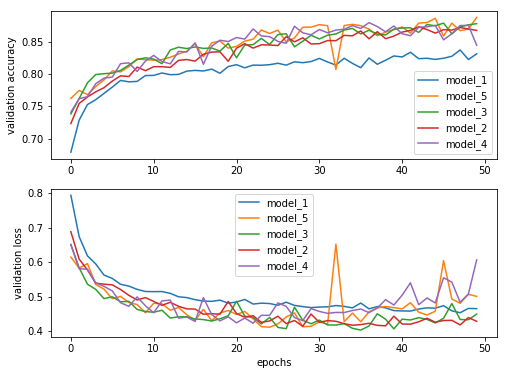

In [37]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['val_acc']
    val_loss = history_dict[model_name][0].history['val_loss']
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend();

plt.savefig("./figures/validation_nn.png")

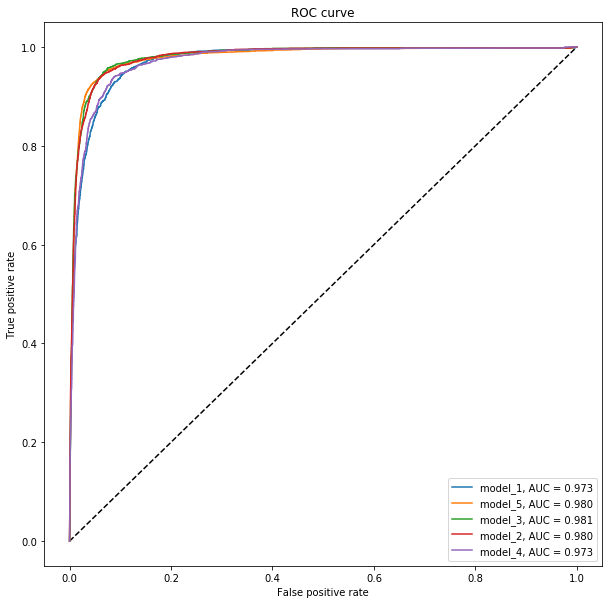

In [38]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

plt.savefig("./figures/roc_nn.png")

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, nodes, 2)

estimator = KerasClassifier(build_fn=create_model, epochs=50, batch_size=5, verbose=0)

In [40]:
scores = cross_val_score(estimator, X_train, Y_train, cv=5)
print("Accuracy : {:0.3f} (+/- {:0.3f})".format(scores.mean(), scores.std()))

Accuracy : 0.851 (+/- 0.008)


In [41]:
estimator.fit(X_train, Y_train,
             batch_size=5,
             epochs=50,
             verbose=0,
             validation_data=(X_test, Y_test),
             callbacks=[cb])

In [42]:
tests_ids = car_test['id']
del car_test['id']

In [43]:
test_scaled = scaler.transform(car_test)

/Users/davidalbertomartinvela/opt/anaconda3/envs/Kaggle/lib/python3.5/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [44]:
predict = estimator.predict(test_scaled)

In [45]:
print(predict)

[4 0 1 ... 2 4 4]


In [46]:
submit = pd.read_csv('../data/sample.csv')
submit['Precio_cat'] = predict
submit.to_csv('mis_resultados_nn.csv', index=False)